## Green House Gas Emission Dataset

#### Below we have loaded the green house gas emission dataset which we will be using as one of the pollutants for attaching with our crop production dataset

In [16]:
#Pkg.add("CSV")
#Pkg.add("VegaDatasets")
using Pkg
using Query, DataFrames
using VegaLite
using Statistics,VegaDatasets
using CSV

#### Loading the dataset for Greenhouse gas emission

In [8]:
air_ghg = CSV.read("AIR_GHG_16102019064621207.csv")

51614×17 DataFrame. Omitted printing of 12 columns
│ Row   │ COU    │ Country      │ POL    │ Pollutant        │ VAR        │
│       │ String │ String       │ String │ String           │ String     │
├───────┼────────┼──────────────┼────────┼──────────────────┼────────────┤
│ 1     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 2     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 3     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 4     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 5     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 6     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 7     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 8     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 9     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 10    │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
⋮
│ 51604 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51605 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51606 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51607 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51608 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51609 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51610 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51611 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51612 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51613 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51614 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │

In [9]:
air_ghg |> DataFrame

51614×17 DataFrame. Omitted printing of 12 columns
│ Row   │ COU    │ Country      │ POL    │ Pollutant        │ VAR        │
│       │ String │ String       │ String │ String           │ String     │
├───────┼────────┼──────────────┼────────┼──────────────────┼────────────┤
│ 1     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 2     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 3     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 4     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 5     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 6     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 7     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 8     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 9     │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
│ 10    │ AUS    │ Australia    │ GHG    │ Greenhouse gases │ TOTAL      │
⋮
│ 51604 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51605 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51606 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51607 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51608 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51609 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51610 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51611 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51612 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51613 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │
│ 51614 │ OECD   │ OECD - Total │ GHG    │ Greenhouse gases │ ENER_CO2_P │

##### Filtering the data for years 2001 to 2015. Taking only green house gas emission and Total count for these emissions. We are taking only GHG as a pollutant because it's the summation of other pollutants present in the column

In [10]:
ghg = air_ghg |> @filter(_.Year .>= 2001 && _.Year.<=2015 && _.POL .== "GHG" && _.VAR .== "TOTAL")

?x17 query result
COU │ Country   │ POL │ Pollutant        │ VAR  
────┼───────────┼─────┼──────────────────┼──────
AUS │ Australia │ GHG │ Greenhouse gases │ TOTAL
AUS │ Australia │ GHG │ Greenhouse gases │ TOTAL
AUS │ Australia │ GHG │ Greenhouse gases │ TOTAL
AUS │ Australia │ GHG │ Greenhouse gases │ TOTAL
AUS │ Australia │ GHG │ Greenhouse gases │ TOTAL
AUS │ Australia │ GHG │ Greenhouse gases │ TOTAL
AUS │ Australia │ GHG │ Greenhouse gases │ TOTAL
AUS │ Australia │ GHG │ Greenhouse gases │ TOTAL
AUS │ Australia │ GHG │ Greenhouse gases │ TOTAL
AUS │ Australia │ GHG │ Greenhouse gases │ TOTAL
... with more rows, and 12 more columns: Variable, YEA, Year, Unit Code, Unit, PowerCode Code, PowerCode, Reference Period Code, Reference Period, Value, Flag Codes, Flags

In [11]:
final_ghg = ghg |> @select(:COU,:Country,:Value) |> DataFrame

659×3 DataFrame
│ Row │ COU    │ Country                       │ Value     │
│     │ String │ String                        │ Float64   │
├─────┼────────┼───────────────────────────────┼───────────┤
│ 1   │ AUS    │ Australia                     │ 4.92462e5 │
│ 2   │ AUS    │ Australia                     │ 4.96319e5 │
│ 3   │ AUS    │ Australia                     │ 498119.0  │
│ 4   │ AUS    │ Australia                     │ 5.15931e5 │
│ 5   │ AUS    │ Australia                     │ 521801.0  │
│ 6   │ AUS    │ Australia                     │ 5.26437e5 │
│ 7   │ AUS    │ Australia                     │ 5.33138e5 │
│ 8   │ AUS    │ Australia                     │ 537032.0  │
│ 9   │ AUS    │ Australia                     │ 5.40913e5 │
│ 10  │ AUS    │ Australia                     │ 5.37275e5 │
⋮
│ 649 │ EU28   │ European Union (28 countries) │ 5.22843e6 │
│ 650 │ EU28   │ European Union (28 countries) │ 5.21452e6 │
│ 651 │ EU28   │ European Union (28 countries) │ 5.16243e6 │
│ 652 │ EU28   │ European Union (28 countries) │ 5.047e6   │
│ 653 │ EU28   │ European Union (28 countries) │ 4.6819e6  │
│ 654 │ EU28   │ European Union (28 countries) │ 4.78363e6 │
│ 655 │ EU28   │ European Union (28 countries) │ 4.62638e6 │
│ 656 │ EU28   │ European Union (28 countries) │ 4.56306e6 │
│ 657 │ EU28   │ European Union (28 countries) │ 4.46892e6 │
│ 658 │ EU28   │ European Union (28 countries) │ 4.29764e6 │
│ 659 │ EU28   │ European Union (28 countries) │ 4.32731e6 │

In [12]:
nrow(final_ghg)

659

Removing the rows which does not belong to group such as OECDE, OECD and EU28 as these may cause outlier as all the countries listed in this are also present individually in the dataset. Previously we took country data and keeping group of countries will lead to incorrect analysis. However we can do the analysis for these data separately.

In [13]:
DF_GHG = final_ghg |> @filter(_.COU != "OECDE") |> @filter(_.COU != "OECD")  |> @filter(_.COU != "EU28") |> DataFrame
       

614×3 DataFrame
│ Row │ COU    │ Country   │ Value     │
│     │ String │ String    │ Float64   │
├─────┼────────┼───────────┼───────────┤
│ 1   │ AUS    │ Australia │ 4.92462e5 │
│ 2   │ AUS    │ Australia │ 4.96319e5 │
│ 3   │ AUS    │ Australia │ 498119.0  │
│ 4   │ AUS    │ Australia │ 5.15931e5 │
│ 5   │ AUS    │ Australia │ 521801.0  │
│ 6   │ AUS    │ Australia │ 5.26437e5 │
│ 7   │ AUS    │ Australia │ 5.33138e5 │
│ 8   │ AUS    │ Australia │ 537032.0  │
│ 9   │ AUS    │ Australia │ 5.40913e5 │
│ 10  │ AUS    │ Australia │ 5.37275e5 │
⋮
│ 604 │ ARG    │ Argentina │ 2.98167e5 │
│ 605 │ ARG    │ Argentina │ 3.07493e5 │
│ 606 │ ARG    │ Argentina │ 321462.0  │
│ 607 │ ARG    │ Argentina │ 3.35854e5 │
│ 608 │ ARG    │ Argentina │ 3.31802e5 │
│ 609 │ ARG    │ Argentina │ 3.22554e5 │
│ 610 │ ARG    │ Argentina │ 3.00695e5 │
│ 611 │ ARG    │ Argentina │ 3.10315e5 │
│ 612 │ ARG    │ Argentina │ 3.1067e5  │
│ 613 │ ARG    │ Argentina │ 3.21012e5 │
│ 614 │ ARG    │ Argentina │ 3.22555e5 │

In [14]:
nrow(DF_GHG)

614

#### Grouping by different countries and summarising their average GHG emmisions

In [17]:
final_ghg = DF_GHG |> @groupby(_.Country)|> @map({Country = key(_), GHG_Emission=mean(_.Value)}) |> DataFrame

44×2 DataFrame
│ Row │ Country                      │ GHG_Emission │
│     │ String                       │ Float64      │
├─────┼──────────────────────────────┼──────────────┤
│ 1   │ Australia                    │ 5.24593e5    │
│ 2   │ Austria                      │ 84924.1      │
│ 3   │ Belgium                      │ 1.33952e5    │
│ 4   │ Canada                       │ 7.20181e5    │
│ 5   │ Czech Republic               │ 1.4111e5     │
│ 6   │ Denmark                      │ 64812.9      │
│ 7   │ Finland                      │ 71540.7      │
│ 8   │ France                       │ 5.22384e5    │
│ 9   │ Germany                      │ 9.69707e5    │
│ 10  │ Greece                       │ 1.21379e5    │
⋮
│ 34  │ Russia                       │ 2.03748e6    │
│ 35  │ Slovenia                     │ 19577.5      │
│ 36  │ Lithuania                    │ 21479.0      │
│ 37  │ Latvia                       │ 11465.4      │
│ 38  │ Brazil                       │ 8.85574e5    │
│ 39  │ China (People's Republic of) │ 9.68081e6    │
│ 40  │ Colombia                     │ 1.29501e5    │
│ 41  │ Costa Rica                   │ 12215.6      │
│ 42  │ India                        │ 2.10085e6    │
│ 43  │ Indonesia                    │ 6.68759e5    │
│ 44  │ Argentina                    │ 3.08227e5    │

Grouping by ISO CODE

In [18]:
final_ghg1 = DF_GHG |> @groupby(_.COU)|> @map({ISO_CODE = key(_), GHG_Emission=mean(_.Value)}) |> DataFrame

44×2 DataFrame
│ Row │ ISO_CODE │ GHG_Emission │
│     │ String   │ Float64      │
├─────┼──────────┼──────────────┤
│ 1   │ AUS      │ 5.24593e5    │
│ 2   │ AUT      │ 84924.1      │
│ 3   │ BEL      │ 1.33952e5    │
│ 4   │ CAN      │ 7.20181e5    │
│ 5   │ CZE      │ 1.4111e5     │
│ 6   │ DNK      │ 64812.9      │
│ 7   │ FIN      │ 71540.7      │
│ 8   │ FRA      │ 5.22384e5    │
│ 9   │ DEU      │ 9.69707e5    │
│ 10  │ GRC      │ 1.21379e5    │
⋮
│ 34  │ RUS      │ 2.03748e6    │
│ 35  │ SVN      │ 19577.5      │
│ 36  │ LTU      │ 21479.0      │
│ 37  │ LVA      │ 11465.4      │
│ 38  │ BRA      │ 8.85574e5    │
│ 39  │ CHN      │ 9.68081e6    │
│ 40  │ COL      │ 1.29501e5    │
│ 41  │ CRI      │ 12215.6      │
│ 42  │ IND      │ 2.10085e6    │
│ 43  │ IDN      │ 6.68759e5    │
│ 44  │ ARG      │ 3.08227e5    │

##### Joining based on "GHG_Emission" column so that we get all the three column in one dataframe -> Country, GHG Emission and ISO Code

In [19]:
final_ghg = join(final_ghg, final_ghg1, on=:GHG_Emission, kind=:inner, makeunique=true ) 

44×3 DataFrame
│ Row │ Country                      │ GHG_Emission │ ISO_CODE │
│     │ String                       │ Float64      │ String   │
├─────┼──────────────────────────────┼──────────────┼──────────┤
│ 1   │ Australia                    │ 5.24593e5    │ AUS      │
│ 2   │ Austria                      │ 84924.1      │ AUT      │
│ 3   │ Belgium                      │ 1.33952e5    │ BEL      │
│ 4   │ Canada                       │ 7.20181e5    │ CAN      │
│ 5   │ Czech Republic               │ 1.4111e5     │ CZE      │
│ 6   │ Denmark                      │ 64812.9      │ DNK      │
│ 7   │ Finland                      │ 71540.7      │ FIN      │
│ 8   │ France                       │ 5.22384e5    │ FRA      │
│ 9   │ Germany                      │ 9.69707e5    │ DEU      │
│ 10  │ Greece                       │ 1.21379e5    │ GRC      │
⋮
│ 34  │ Russia                       │ 2.03748e6    │ RUS      │
│ 35  │ Slovenia                     │ 19577.5      │ SVN      │
│ 36  │ Lithuania                    │ 21479.0      │ LTU      │
│ 37  │ Latvia                       │ 11465.4      │ LVA      │
│ 38  │ Brazil                       │ 8.85574e5    │ BRA      │
│ 39  │ China (People's Republic of) │ 9.68081e6    │ CHN      │
│ 40  │ Colombia                     │ 1.29501e5    │ COL      │
│ 41  │ Costa Rica                   │ 12215.6      │ CRI      │
│ 42  │ India                        │ 2.10085e6    │ IND      │
│ 43  │ Indonesia                    │ 6.68759e5    │ IDN      │
│ 44  │ Argentina                    │ 3.08227e5    │ ARG      │

#### Saving the GreenHouse gas emissions dataset "final_ghg" so that it will be used to combine with crop-production dataset in R

We are writing the csv file of GHG so that we merge it with our crop production dataset, however plotting of the GHG is done in Julia as shown below

In [20]:

CSV.write("GHG.csv",final_ghg)

"GHG.csv"

Plotting the Green House Gas emission or different Countries

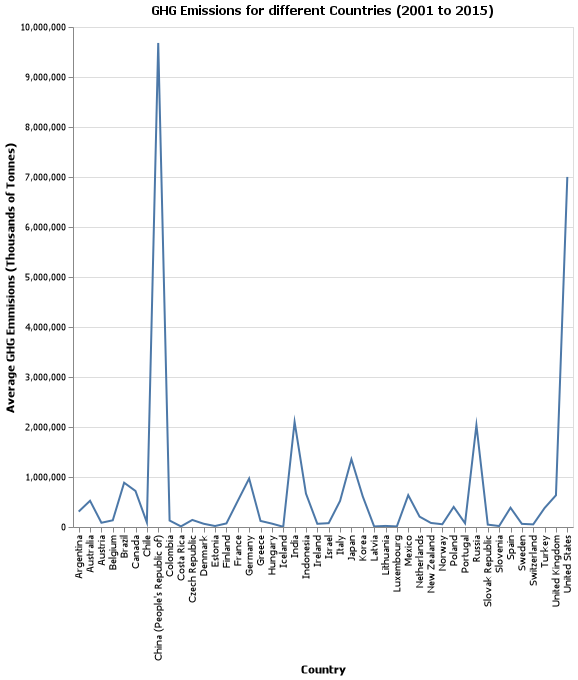

In [26]:
final_ghg |> @vlplot(:line,x={:Country,axis={title="Country"}}, y={:GHG_Emission,axis={title="Average GHG Emmisions (Thousands of Tonnes)"}} , width=500, height= 500, title = "GHG Emissions for different Countries (2001 to 2015)")

### Taking Crop Dataset in Julia to wrangle further

#### Loading The Dataset for Crop Production

This dataset has been read in R in PDF format and then we wrangled the dataset in Julia

In [27]:
using CSV,DataFrames
Crop = CSV.read("crop.csv")

55×13 DataFrame. Omitted printing of 8 columns
│ Row │ Country                     │ 0 to 1  │ 1 to 2  │ 2 to 5  │ 5 to 10 │
│     │ String                      │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼─────────────────────────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ Albania                     │ 6.98    │ 13.12   │ 23.41   │ 5.59    │
│ 2   │ Austria                     │ 0.0     │ 0.21    │ 1.77    │ 4.02    │
│ 3   │ Belgium                     │ 0.0     │ 0.14    │ 2.23    │ 7.28    │
│ 4   │ Bosnia and Herzegovina      │ 20.63   │ 13.55   │ 40.62   │ 17.02   │
│ 5   │ Brazil                      │ 33.41   │ 41.06   │ 92.91   │ 99.78   │
│ 6   │ Bulgaria                    │ 5.89    │ 0.0     │ 8.54    │ 10.05   │
│ 7   │ Burkina Faso                │ 3.7     │ 9.44    │ 39.77   │ 52.11   │
│ 8   │ Cambodia                    │ 0.11    │ 0.19    │ 0.39    │ 0.48    │
│ 9   │ Colombia                    │ 6.23    │ 20.67   │ 0.0     │ 22.86   │
│ 10  │ Costa Rica                  │ 0.11    │ 0.31    │ 1.45    │ 2.2     │
⋮
│ 45  │ Slovenia                    │ 0.41    │ 0.41    │ 2.75    │ 3.7     │
│ 46  │ South Africa                │ 1119.33 │ 5312.17 │ 818.11  │ 2454.33 │
│ 47  │ Spain                       │ 4.79    │ 4.79    │ 26.94   │ 36.29   │
│ 48  │ Sweden                      │ 0.0     │ 0.0     │ 0.15    │ 0.72    │
│ 49  │ Tajikistan                  │ 0.0     │ 0.18    │ 0.71    │ 1.78    │
│ 50  │ Timor-Leste                 │ 0.25    │ 0.01    │ 0.01    │ 0.0     │
│ 51  │ Uganda                      │ 45.7    │ 44.3    │ 17.09   │ 2.07    │
│ 52  │ United Kingdom              │ 0.0     │ 0.0     │ 0.01    │ 1.31    │
│ 53  │ United Republic of Tanzania │ 47.3    │ 82.92   │ 141.09  │ 52.19   │
│ 54  │ United States of America    │ 0.0     │ 0.0     │ 2.16    │ 6.97    │
│ 55  │ Uruguay                     │ 0.0     │ 0.0     │ 0.01    │ 0.07    │

#### Found that Julia is faster in some cases and performs gathering better than R hence used stack function in Julia

In [28]:
DF = stack(Crop) |> DataFrame # making wide to long

605×4 DataFrame
│ Row │ variable       │ value   │ Country                     │ ISO    │
│     │ Symbol         │ Float64 │ String                      │ String │
├─────┼────────────────┼─────────┼─────────────────────────────┼────────┤
│ 1   │ 0 to 1         │ 6.98    │ Albania                     │ ALB    │
│ 2   │ 0 to 1         │ 0.0     │ Austria                     │ AUT    │
│ 3   │ 0 to 1         │ 0.0     │ Belgium                     │ BEL    │
│ 4   │ 0 to 1         │ 20.63   │ Bosnia and Herzegovina      │ BIH    │
│ 5   │ 0 to 1         │ 33.41   │ Brazil                      │ BRA    │
│ 6   │ 0 to 1         │ 5.89    │ Bulgaria                    │ BGR    │
│ 7   │ 0 to 1         │ 3.7     │ Burkina Faso                │ BFA    │
│ 8   │ 0 to 1         │ 0.11    │ Cambodia                    │ KHM    │
│ 9   │ 0 to 1         │ 6.23    │ Colombia                    │ COL    │
│ 10  │ 0 to 1         │ 0.11    │ Costa Rica                  │ CRI    │
⋮
│ 595 │ 1000 to 100000 │ 0.0     │ Slovenia                    │ SVN    │
│ 596 │ 1000 to 100000 │ 0.0     │ South Africa                │ ZAF    │
│ 597 │ 1000 to 100000 │ 0.0     │ Spain                       │ ESP    │
│ 598 │ 1000 to 100000 │ 0.0     │ Sweden                      │ SWE    │
│ 599 │ 1000 to 100000 │ 0.0     │ Tajikistan                  │ TJK    │
│ 600 │ 1000 to 100000 │ 0.0     │ Timor-Leste                 │ TLS    │
│ 601 │ 1000 to 100000 │ 0.0     │ Uganda                      │ UGA    │
│ 602 │ 1000 to 100000 │ 0.0     │ United Kingdom              │ GBR    │
│ 603 │ 1000 to 100000 │ 5.73    │ United Republic of Tanzania │ TZA    │
│ 604 │ 1000 to 100000 │ 0.0     │ United States of America    │ USA    │
│ 605 │ 1000 to 100000 │ 706.18  │ Uruguay                     │ URY    │

In [29]:
DF.variable

605-element Array{Symbol,1}:
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 Symbol("0 to 1")        
 ⋮                       
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")
 Symbol("1000 to 100000")

##### Changing the variable column of the dataset from symbol to string

In [30]:
DF.variable = string.(DF.variable)

605-element Array{String,1}:
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 "0 to 1"        
 ⋮               
 "1000 to 100000"
 "1000 to 100000"
 "1000 to 100000"
 "1000 to 100000"
 "1000 to 100000"
 "1000 to 100000"
 "1000 to 100000"
 "1000 to 100000"
 "1000 to 100000"
 "1000 to 100000"
 "1000 to 100000"
 "1000 to 100000"

#### Grouping by ISO_Code and aggregating the value column

In [31]:
DF1 = DF |>
        @groupby(_.ISO) |>
        @map({ISO_CODE = key(_),Crop_Produced = sum(_.value) }) |>
        DataFrame

55×2 DataFrame
│ Row │ ISO_CODE │ Crop_Produced │
│     │ String   │ Float64       │
├─────┼──────────┼───────────────┤
│ 1   │ ALB      │ 52.49         │
│ 2   │ AUT      │ 519.36        │
│ 3   │ BEL      │ 662.91        │
│ 4   │ BIH      │ 94.25         │
│ 5   │ BRA      │ 2561.09       │
│ 6   │ BGR      │ 820.04        │
│ 7   │ BFA      │ 492.83        │
│ 8   │ KHM      │ 1.77          │
│ 9   │ COL      │ 205.15        │
│ 10  │ CRI      │ 55.06         │
⋮
│ 45  │ SVN      │ 20.26         │
│ 46  │ ZAF      │ 9723.49       │
│ 47  │ ESP      │ 931.67        │
│ 48  │ SWE      │ 311.91        │
│ 49  │ TJK      │ 18.64         │
│ 50  │ TLS      │ 0.27          │
│ 51  │ UGA      │ 112.59        │
│ 52  │ GBR      │ 1025.01       │
│ 53  │ TZA      │ 393.86        │
│ 54  │ USA      │ 9145.22       │
│ 55  │ URY      │ 841.91        │

#### Grouping by Country and aggregating the value column

In [33]:
DF2 = DF |>
        @groupby(_.Country) |>
        @map({Country = key(_),Crop_Produced = sum(_.value) }) |>
        DataFrame

55×2 DataFrame
│ Row │ Country                     │ Crop_Produced │
│     │ String                      │ Float64       │
├─────┼─────────────────────────────┼───────────────┤
│ 1   │ Albania                     │ 52.49         │
│ 2   │ Austria                     │ 519.36        │
│ 3   │ Belgium                     │ 662.91        │
│ 4   │ Bosnia and Herzegovina      │ 94.25         │
│ 5   │ Brazil                      │ 2561.09       │
│ 6   │ Bulgaria                    │ 820.04        │
│ 7   │ Burkina Faso                │ 492.83        │
│ 8   │ Cambodia                    │ 1.77          │
│ 9   │ Colombia                    │ 205.15        │
│ 10  │ Costa Rica                  │ 55.06         │
⋮
│ 45  │ Slovenia                    │ 20.26         │
│ 46  │ South Africa                │ 9723.49       │
│ 47  │ Spain                       │ 931.67        │
│ 48  │ Sweden                      │ 311.91        │
│ 49  │ Tajikistan                  │ 18.64         │
│ 50  │ Timor-Leste                 │ 0.27          │
│ 51  │ Uganda                      │ 112.59        │
│ 52  │ United Kingdom              │ 1025.01       │
│ 53  │ United Republic of Tanzania │ 393.86        │
│ 54  │ United States of America    │ 9145.22       │
│ 55  │ Uruguay                     │ 841.91        │

##### joining DF1 and DF2 to obtain the columns "Crop_Produced", "ISO_CODE" and "Country" 

In [34]:
DF = join(DF1, DF2, on=:Crop_Produced, kind=:inner, makeunique=true ) 

55×3 DataFrame
│ Row │ ISO_CODE │ Crop_Produced │ Country                     │
│     │ String   │ Float64       │ String                      │
├─────┼──────────┼───────────────┼─────────────────────────────┤
│ 1   │ ALB      │ 52.49         │ Albania                     │
│ 2   │ AUT      │ 519.36        │ Austria                     │
│ 3   │ BEL      │ 662.91        │ Belgium                     │
│ 4   │ BIH      │ 94.25         │ Bosnia and Herzegovina      │
│ 5   │ BRA      │ 2561.09       │ Brazil                      │
│ 6   │ BGR      │ 820.04        │ Bulgaria                    │
│ 7   │ BFA      │ 492.83        │ Burkina Faso                │
│ 8   │ KHM      │ 1.77          │ Cambodia                    │
│ 9   │ COL      │ 205.15        │ Colombia                    │
│ 10  │ CRI      │ 55.06         │ Costa Rica                  │
⋮
│ 45  │ SVN      │ 20.26         │ Slovenia                    │
│ 46  │ ZAF      │ 9723.49       │ South Africa                │
│ 47  │ ESP      │ 931.67        │ Spain                       │
│ 48  │ SWE      │ 311.91        │ Sweden                      │
│ 49  │ TJK      │ 18.64         │ Tajikistan                  │
│ 50  │ TLS      │ 0.27          │ Timor-Leste                 │
│ 51  │ UGA      │ 112.59        │ Uganda                      │
│ 52  │ GBR      │ 1025.01       │ United Kingdom              │
│ 53  │ TZA      │ 393.86        │ United Republic of Tanzania │
│ 54  │ USA      │ 9145.22       │ United States of America    │
│ 55  │ URY      │ 841.91        │ Uruguay                     │

#### Checking For missing Values - There are no missing values for any of the columns

In [36]:
isna.(DF) |> @filter(_.ISO_CODE == "true") 

0x3 query result
ISO_CODE │ Crop_Produced │ Country
─────────┼───────────────┼────────

#### Writing the CSV File which will be used in the R for merging with GHG emission dataset

In [37]:

CSV.write("Crop.csv",DF)

"Crop.csv"